# Example 1
##  a simple example of linear regression for one variable

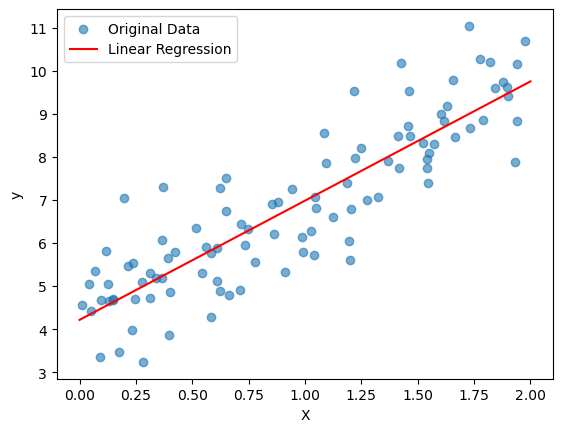

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some random data for demonstration purposes
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions using the model
X_new = np.array([[0], [2]])
y_pred = model.predict(X_new)

# Plot the original data and the regression line
plt.scatter(X, y, alpha=0.6, label='Original Data')
plt.plot(X_new, y_pred, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [14]:
model.coef_,  model.intercept_

(array([[2.77011339]]), array([4.21509616]))

In [15]:
# Extract coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficient:", coefficients)
print("Intercept:", intercept)

Coefficient: [[2.77011339]]
Intercept: [4.21509616]


Coefficients will be an array containing the slope (or coefficients) for each feature

intercept will be the y-intercept of the linear regression line. 

These values represent the parameters of the fitted line in the form y = mx + b (where m is the coefficient and b is the intercept).

# Example 2
## the multiple-variable linear regression model

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some random data for demonstration purposes
np.random.seed(42)
X = 2 * np.random.rand(100, 3)  # Three features
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] - 1 * X[:, 2] + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Extract coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Mean Squared Error: 2.0173924806102983
Coefficients: [ 3.05294884  1.962303   -0.65697038]
Intercept: 3.914989558367081


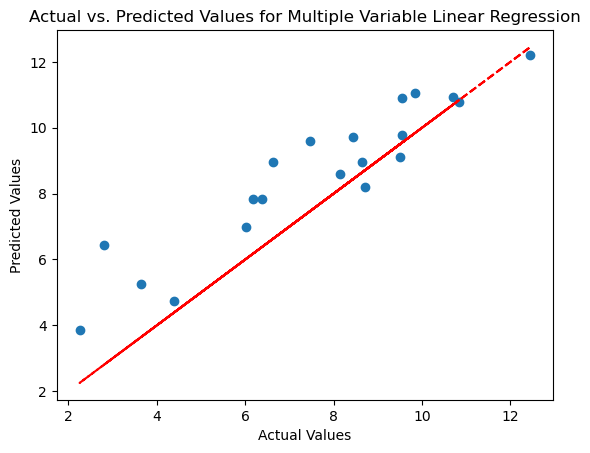

In [36]:

# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, label='Baseline (y=x)', color='red', linestyle='--')
plt.title('Actual vs. Predicted Values for Multiple Variable Linear Regression')
plt.show()

In this plot, the x-axis represents the actual values (y_test), and the y-axis represents the predicted values (y_pred). Ideally, the points should fall along a diagonal line, indicating a good fit. You can use this visualization to assess how well the model's predictions align with the actual values.

Lasso Mean Squared Error: 2.1721555069420897
Ridge Mean Squared Error: 2.0417565995489437
Elastic Net Mean Squared Error: 2.0183764238791406


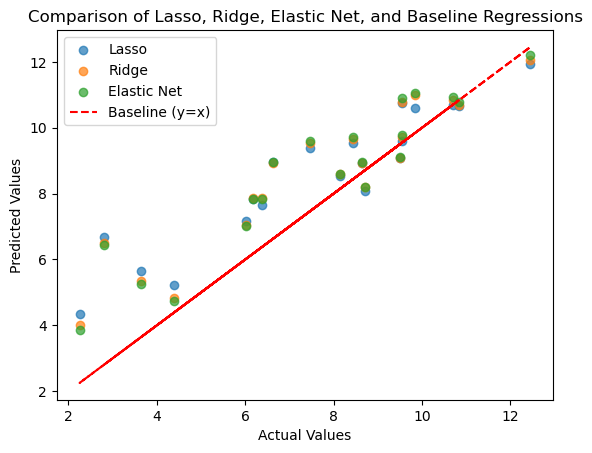

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

# Generate some random data for demonstration purposes
np.random.seed(42)
X = 2 * np.random.rand(100, 3)  # Three features
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] - 1 * X[:, 2] + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Mean Squared Error:", lasso_mse)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Mean Squared Error:", ridge_mse)

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.001, l1_ratio=0.9)
elastic_net_model.fit(X_train, y_train)
elastic_net_pred = elastic_net_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
print("Elastic Net Mean Squared Error:", elastic_net_mse)

# Visualize the results
plt.scatter(y_test, lasso_pred, label='Lasso', alpha=0.7)
plt.scatter(y_test, ridge_pred, label='Ridge', alpha=0.7)
plt.scatter(y_test, elastic_net_pred, label='Elastic Net', alpha=0.7)
plt.plot(y_test, y_test, label='Baseline (y=x)', color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Comparison of Lasso, Ridge, Elastic Net, and Baseline Regressions')
plt.show()



# Example 3

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


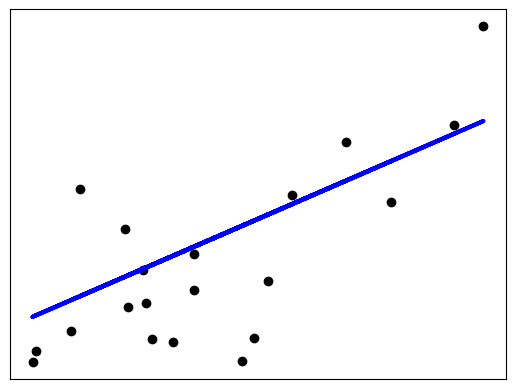

In [3]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()